In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
import time

#https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93

In [3]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
Y = pd.Categorical.from_codes(iris.target, iris.target_names)
Y

[setosa, setosa, setosa, setosa, setosa, ..., virginica, virginica, virginica, virginica, virginica]
Length: 150
Categories (3, object): [setosa, versicolor, virginica]

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y = pd.get_dummies(Y)

In [6]:
y

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

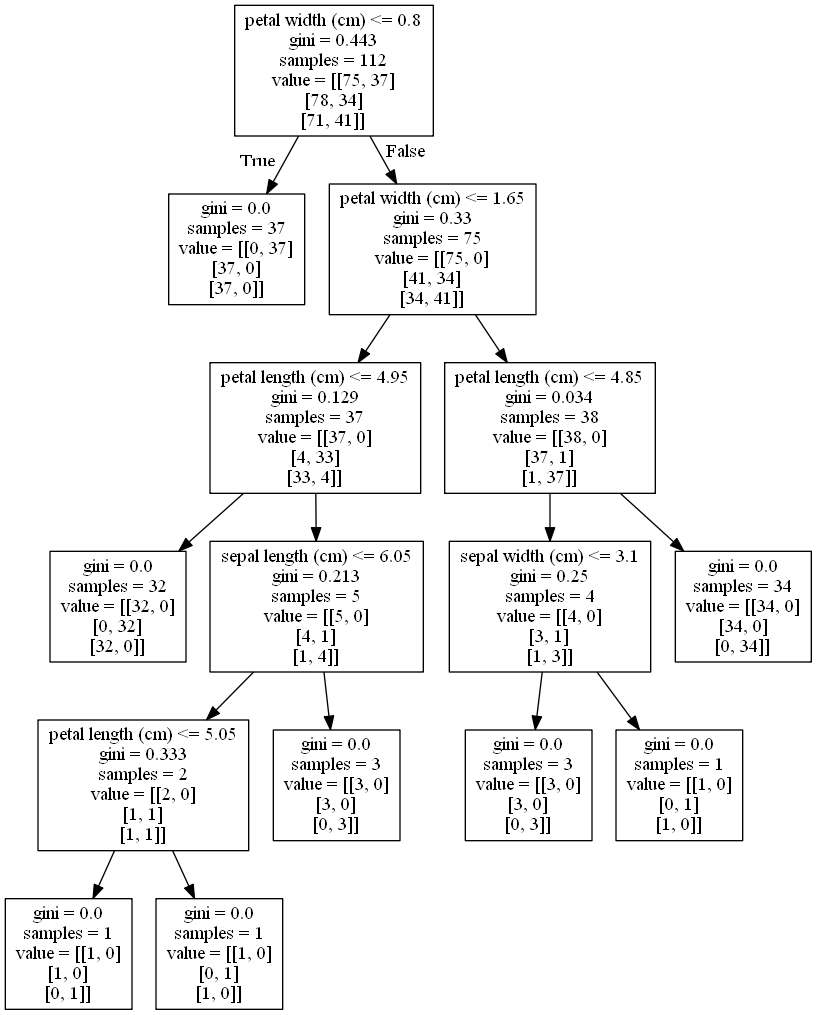

In [10]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [11]:
y_pred = dt.predict(X_test)

In [12]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)
#As we can see, our decision tree classifier correctly classified 37/38 plants.

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [24]:
# Algorithm tuning 
np.random.seed(42)
start = time.time()
param_dist = {'max_depth': [2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  1.02


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
dt.set_params(criterion = 'gini',
                  max_features = None, 
                  max_depth = 4)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
y_pred = dt.predict(X_test)

In [29]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)
#As we can see, our decision tree classifier correctly classified 37/38 plants.

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)